## EDA Home Credit Default Risk
### Kindeep Dhatt, Kareem Husseini, Ericka Augustyniak, Mathai Paul

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os


In [6]:
df = pd.read_csv("/users/macbook/Downloads/FINAL_DATA.CSV")

In [8]:
df.head(20)

,SK_ID_CURR,TARGET,FLAG_CASH_LOAN,CODE_FEMALE,FLAG_OWN_CAR,FLAG_OWN_RESTATE,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_PAYMENT,...,FLAG_EDU_SEC,FLAG_MS_MARRIED,FLAG_MS_SEP,FLAG_MS_CM,FLAG_MS_SINGLE,DAYS_AGE,DAYS_EMPLOYED,CNT_FAM_MEMBERS,CNT_PREV_APPS,DAYS_PREV_DPD
0,375280,0,1,1,1,0,2,135000,755190,36459.0,...,1,1,0,0,0,12060,3806,4,2,0
1,375281,0,1,1,0,1,0,90000,306306,14864.0,...,1,1,0,0,0,17041,10101,2,5,1
2,375282,0,1,0,1,1,2,315000,524493,32216.0,...,1,1,0,0,0,14697,1770,4,3,0
3,375283,0,1,1,0,1,0,148500,373311,16574.0,...,1,1,0,0,0,19244,182,2,7,0
4,375284,0,0,0,1,0,0,135000,180000,9000.0,...,1,0,0,0,1,9180,861,1,3,0
5,375285,0,1,1,1,1,0,144000,101880,10206.0,...,1,0,0,0,1,24595,2851,1,6,0
6,375286,0,1,1,1,1,0,157500,781695,25344.0,...,1,0,0,0,1,17254,1440,1,3,0
7,375287,0,1,1,1,0,1,229500,1079883,35820.0,...,0,0,0,1,0,13978,1763,3,7,0
8,375288,0,1,1,0,1,0,135000,634482,20597.0,...,1,1,0,0,0,19010,11185,2,3,0
9,375289,0,1,1,0,1,0,292500,1129500,31190.0,...,0,0,0,0,0,19491,2896,1,6,0


In [9]:
df['TARGET'].value_counts()

0    248809
1     21739
Name: TARGET, dtype: int64

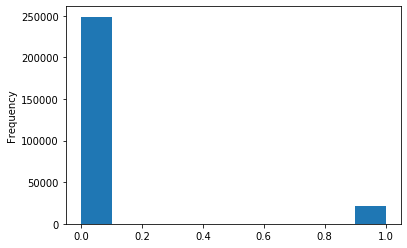

In [10]:
df['TARGET'].astype(int).plot.hist();

In [11]:
df.dtypes.value_counts()

int64      20
float64     2
dtype: int64

In [20]:
(df['DAYS_AGE']).describe()

count    270548.000000
mean      16070.731563
std        4351.459745
min        7673.000000
25%       12465.000000
50%       15776.000000
75%       19699.000000
max       25201.000000
Name: DAYS_AGE, dtype: float64

In [15]:
df['DAYS_EMPLOYED'].describe()

count    270548.000000
mean       1982.186577
std        2310.850268
min           0.000000
25%         303.000000
50%        1258.000000
75%        2796.000000
max       17912.000000
Name: DAYS_EMPLOYED, dtype: float64

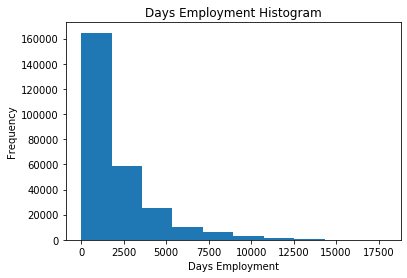

In [16]:
df['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [34]:
anom = df[df['DAYS_EMPLOYED'] == 365243]
non_anom = df[df['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))


The non-anomalies default on 8.04% of loans


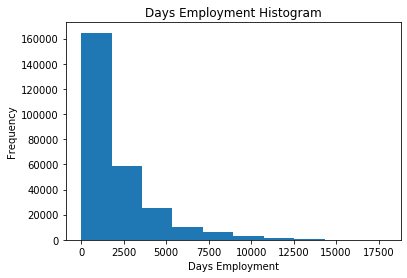

In [18]:
df['DAYS_EMPLOYED_ANOM'] = df["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
df['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

df['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [21]:
correlations = df.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 FLAG_OWN_RESTATE     -0.009977
AMT_PAYMENT          -0.007533
SK_ID_CURR           -0.003009
FLAG_MS_SEP          -0.000632
AMT_INCOME_TOTAL     -0.000101
CNT_FAM_MEMBERS       0.010132
CNT_CHILDREN          0.019203
FLAG_MS_CM            0.020524
CNT_PREV_APPS         0.023230
FLAG_MS_SINGLE        0.026976
DAYS_PREV_DPD         0.028232
FLAG_CASH_LOAN        0.031701
FLAG_EDU_SEC          0.048659
TARGET                1.000000
DAYS_EMPLOYED_ANOM         NaN
Name: TARGET, dtype: float64

Most Negative Correlations:
 DAYS_AGE           -0.079942
CODE_FEMALE        -0.057159
FLAG_EDU_HIGHER    -0.052391
DAYS_EMPLOYED      -0.044492
AMT_ITEM_PRICE     -0.034526
AMT_CREDIT         -0.025404
FLAG_MS_MARRIED    -0.022488
FLAG_OWN_CAR       -0.018009
FLAG_OWN_RESTATE   -0.009977
AMT_PAYMENT        -0.007533
SK_ID_CURR         -0.003009
FLAG_MS_SEP        -0.000632
AMT_INCOME_TOTAL   -0.000101
CNT_FAM_MEMBERS     0.010132
CNT_CHILDREN        0.019203
Name: TARGET

In [22]:
# Find the correlation of the positive days since age and target
df['DAYS_AGE'] = abs(df['DAYS_AGE'])
df['DAYS_AGE'].corr(df['TARGET'])

-0.07994164109625838

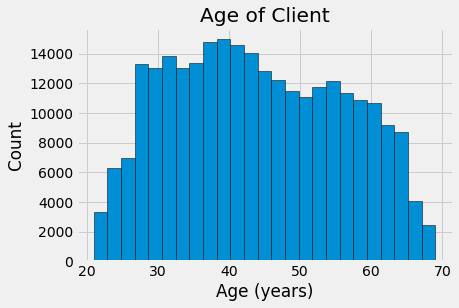

In [24]:
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(df['DAYS_AGE'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

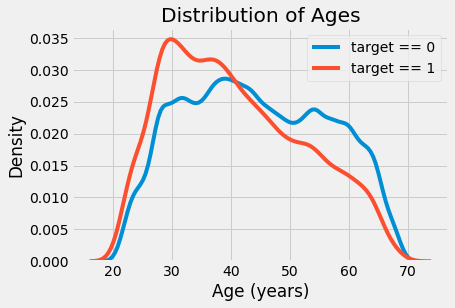

In [26]:
# KDE plot of loans that were repaid on time
sns.kdeplot(df.loc[df['TARGET'] == 0, 'DAYS_AGE'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(df.loc[df['TARGET'] == 1, 'DAYS_AGE'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

In [32]:
# Extract the Income, credit, and payment variables and show correlations
ext_data = df[['TARGET', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_PAYMENT', 'DAYS_AGE']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_PAYMENT,DAYS_AGE
TARGET,1.000000,-0.000101,-0.025404,-0.007533,-0.079942
AMT_INCOME_TOTAL,-0.000101,1.000000,0.138806,0.169155,-0.024579
AMT_CREDIT,-0.025404,0.138806,1.000000,0.767255,0.060929
AMT_PAYMENT,-0.007533,0.169155,0.767255,1.000000,-0.012813
DAYS_AGE,-0.079942,-0.024579,0.060929,-0.012813,1.000000


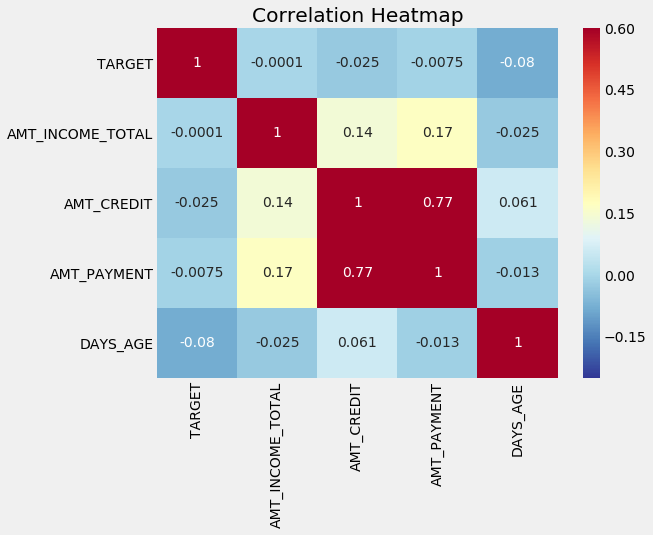

In [33]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');
